In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import CategoricalNB
from sklearn.preprocessing import OrdinalEncoder

In [2]:
np.random.seed(42)
n_samples = 100000

data = pd.DataFrame({
    'Nivel_Exp': np.random.choice(['Bajo', 'Medio', 'Alto'], size=n_samples),
    'Equipamiento': np.random.choice(['Básico', 'Intermedio', 'Avanzado'], size=n_samples),
    'Salud': np.random.choice(['Baja', 'Media', 'Alta'], size=n_samples),
    'Exito': np.random.choice(['Sí', 'No'], size=n_samples) 
})

In [3]:
def asignar_exito(row):
    # Caso ideal: Todo alto
    if row['Nivel_Exp'] == 'Alto' and row['Equipamiento'] == 'Avanzado' and row['Salud'] == 'Alta':
        return np.random.choice(['Sí', 'No'], p=[0.95, 0.05])
    # Caso crítico: Todo bajo
    elif row['Nivel_Exp'] == 'Bajo' and row['Equipamiento'] == 'Básico' and row['Salud'] == 'Baja':
        return np.random.choice(['Sí', 'No'], p=[0.10, 0.90])
    # Caso intermedio:
    elif row['Nivel_Exp'] == 'Medio' and row['Salud'] == 'Media':
        return np.random.choice(['Sí', 'No'], p=[0.60, 0.40])
    else:
        return np.random.choice(['Sí', 'No'], p=[0.40, 0.60])

data['Exito'] = data.apply(asignar_exito, axis=1)

In [4]:
encoder = OrdinalEncoder()
X = encoder.fit_transform(data[['Nivel_Exp', 'Equipamiento', 'Salud']])
y = data['Exito'].map({'No': 0, 'Sí': 1})

In [5]:
model = CategoricalNB()
model.fit(X, y)

,"alpha alpha: float, default=1.0Additive (Laplace/Lidstone) smoothing parameter(set alpha=0 and force_alpha=True, for no smoothing).",1.0
,"force_alpha force_alpha: bool, default=TrueIf False and alpha is less than 1e-10, it will set alpha to1e-10. If True, alpha will remain unchanged. This may causenumerical errors if alpha is too close to 0... versionadded:: 1.2.. versionchanged:: 1.4 The default value of `force_alpha` changed to `True`.",True
,"fit_prior fit_prior: bool, default=TrueWhether to learn class prior probabilities or not.If false, a uniform prior will be used.",True
,"class_prior class_prior: array-like of shape (n_classes,), default=NonePrior probabilities of the classes. If specified, the priors are notadjusted according to the data.",None
,"min_categories min_categories: int or array-like of shape (n_features,), default=NoneMinimum number of categories per feature.- integer: Sets the minimum number of categories per feature to `n_categories` for each features.- array-like: shape (n_features,) where `n_categories[i]` holds the minimum number of categories for the ith column of the input.- None (default): Determines the number of categories automatically from the training data... versionadded:: 0.24",None


In [7]:
combinations = pd.DataFrame({
    'Nivel_Exp':    ['Alto', 'Alto', 'Bajo', 'Bajo', 'Medio'],
    'Equipamiento': ['Avanzado', 'Básico', 'Básico', 'Avanzado', 'Intermedio'],
    'Salud':        ['Alta', 'Baja', 'Baja', 'Alta', 'Media']
})

X_new = encoder.transform(combinations)
probs = model.predict_proba(X_new)

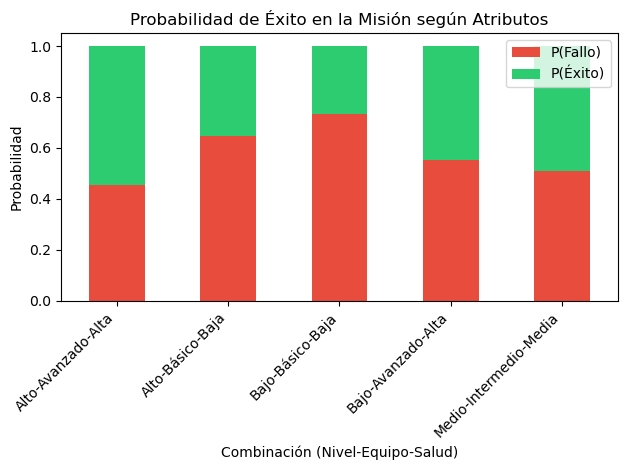

In [8]:
combinations['P(Fallo)'] = probs[:, 0]
combinations['P(Éxito)'] = probs[:, 1]
combinations['Etiqueta'] = combinations['Nivel_Exp'] + "-" + combinations['Equipamiento'] + "-" + combinations['Salud']


combinations.plot(x='Etiqueta', y=['P(Fallo)', 'P(Éxito)'], kind='bar', stacked=True, color=['#e74c3c', '#2ecc71'])
plt.title('Probabilidad de Éxito en la Misión según Atributos')
plt.xlabel('Combinación (Nivel-Equipo-Salud)')
plt.ylabel('Probabilidad')
plt.xticks(rotation=45, ha='right')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()